In [1]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/teo/userdata/git_libraries/jgb-omr


In [249]:
import torch
from omr_cnn import OMRModel, Dataset, Tokenizer, Inferencer


dataset = Dataset('labels_from_ls.csv', 'jeongganbo-png/unique-char-pngs/')
pre_dataset = Dataset('cv_label.csv', 'jeongganbo-png/splited-pngs/')

tokenizer = dataset.tokenizer + pre_dataset.tokenizer
pre_dataset.tokenizer = tokenizer
dataset.tokenizer = tokenizer

In [252]:
inferencer = Inferencer()
inferencer('jeongganbo-png/splited-pngs/여민락_piri_859.png')

'배남_반길이:2 배임_덧길이:5 배남_ㅅ_3:8'

In [244]:
tokenizer = Tokenizer(vocab_txt_fn='tokenizer.txt')
tokenizer.vocab

['<pad>',
 '<start>',
 '<end>',
 ' ',
 '-',
 '0',
 ':1',
 ':10',
 ':11',
 ':12',
 ':13',
 ':14',
 ':15',
 ':2',
 ':3',
 ':4',
 ':5',
 ':6',
 ':7',
 ':8',
 ':9',
 '?',
 '_2',
 '_3',
 '_4',
 '_6',
 '_7',
 '_8',
 '_9',
 '_?',
 '_v',
 '_|',
 '_ㅅ',
 '_겹흘림표',
 '_끊는표',
 '_나니나',
 '_나니로',
 '_네로네',
 '_노',
 '_노네',
 '_노니로',
 '_노니르',
 '_노라',
 '_노리노',
 '_느나니나',
 '_느니',
 '_느니르',
 '_느로니르',
 '_니',
 '_니나',
 '_니레',
 '_더름표',
 '_덧길이',
 '_덧길이표',
 '_떠이어표',
 '_뜰',
 '_루러표',
 '_리',
 '_반길이',
 '_반길이표',
 '_사',
 '_살갱',
 '_살동',
 '_삼',
 '_상',
 '_서침표',
 '_소지표',
 '_시루표',
 '_식',
 '_싸랭',
 '_쌀갱',
 '_육',
 '_자출',
 '_장지표',
 '_전성',
 '_제자리표',
 '_추성',
 '_퇴성',
 '_퇴추성표',
 '_특강표',
 '_풀어내림표',
 '_하',
 '_하배',
 'ㅅ',
 '같은음표',
 '같음음표',
 '고',
 '나니나',
 '남',
 '노',
 '노라',
 '느나',
 '느나르나니',
 '느니',
 '니',
 '니나',
 '니레나',
 '니로나',
 '대',
 '더름표',
 '덧길이표',
 '리',
 '무',
 '배고',
 '배남',
 '배무',
 '배이',
 '배임',
 '배중',
 '배태',
 '배황',
 '쉼표',
 '요성표',
 '임',
 '중',
 '중청황',
 '청고',
 '청남',
 '청무',
 '청임',
 '청중',
 '청태',
 '청협',
 '청황',
 '추성',
 '태',
 '퇴성',
 '하배남',
 '하배무',
 '

In [232]:
with open('tokenizer.txt', 'w') as f:
    f.write('\n'.join(tokenizer.vocab))

In [240]:
with open('tokenizer.txt', 'r') as f:
  test = f.read().split('\n')
test

['<pad>',
 '<start>',
 '<end>',
 ' ',
 '-',
 '0',
 ':1',
 ':10',
 ':11',
 ':12',
 ':13',
 ':14',
 ':15',
 ':2',
 ':3',
 ':4',
 ':5',
 ':6',
 ':7',
 ':8',
 ':9',
 '?',
 '_2',
 '_3',
 '_4',
 '_6',
 '_7',
 '_8',
 '_9',
 '_?',
 '_v',
 '_|',
 '_ㅅ',
 '_겹흘림표',
 '_끊는표',
 '_나니나',
 '_나니로',
 '_네로네',
 '_노',
 '_노네',
 '_노니로',
 '_노니르',
 '_노라',
 '_노리노',
 '_느나니나',
 '_느니',
 '_느니르',
 '_느로니르',
 '_니',
 '_니나',
 '_니레',
 '_더름표',
 '_덧길이',
 '_덧길이표',
 '_떠이어표',
 '_뜰',
 '_루러표',
 '_리',
 '_반길이',
 '_반길이표',
 '_사',
 '_살갱',
 '_살동',
 '_삼',
 '_상',
 '_서침표',
 '_소지표',
 '_시루표',
 '_식',
 '_싸랭',
 '_쌀갱',
 '_육',
 '_자출',
 '_장지표',
 '_전성',
 '_제자리표',
 '_추성',
 '_퇴성',
 '_퇴추성표',
 '_특강표',
 '_풀어내림표',
 '_하',
 '_하배',
 'ㅅ',
 '같은음표',
 '같음음표',
 '고',
 '나니나',
 '남',
 '노',
 '노라',
 '느나',
 '느나르나니',
 '느니',
 '니',
 '니나',
 '니레나',
 '니로나',
 '대',
 '더름표',
 '덧길이표',
 '리',
 '무',
 '배고',
 '배남',
 '배무',
 '배이',
 '배임',
 '배중',
 '배태',
 '배황',
 '쉼표',
 '요성표',
 '임',
 '중',
 '중청황',
 '청고',
 '청남',
 '청무',
 '청임',
 '청중',
 '청태',
 '청협',
 '청황',
 '추성',
 '태',
 '퇴성',
 '하배남',
 '하배무',
 '

In [245]:
model = OMRModel(128, vocab_size=len(dataset.tokenizer.vocab), num_gru_layers=2)
model.eval()
states = torch.load('nmt_model_best.pt')
model.load_state_dict(states['model'])


<All keys matched successfully>

In [246]:
from pathlib import Path

pngs = list(Path('jeongganbo-png/splited-pngs/').glob('*.png'))
pngs = [str(p) for p in pngs if '여민락' in str(p)]
len(pngs)

19200

In [247]:
from collections import OrderedDict
from tqdm.auto import tqdm

class InferenceSet(Dataset):
  def __init__(self, pngs, transform):
      self.pngs = pngs
      self.transform = transform
      
  def __len__(self):
      return len(self.pngs)
  
  def __getitem__(self, idx):
      png = self.pngs[idx]
      img = cv2.imread(str(png))
      img = self.transform(img)
      return img, png
  

inference_set = InferenceSet(pngs, dataset.transform)

outputs = {}
for idx in tqdm(range(len(inference_set))):
  img, png_fn = inference_set[idx]
  pred = model.inference(img.unsqueeze(0))
  decoded = tokenizer.decode(pred)
  outputs[png_fn] = decoded

outputs = OrderedDict(sorted(outputs.items(), key=lambda x: int(x[0].split('_')[-1].split('.')[0])))

  0%|          | 0/19200 [00:00<?, ?it/s]

In [248]:
inst_names = ['piri', 'daegeum', 'ajaeng', 'haegeum', 'geomungo', 'gayageum']
result_by_inst = {inst: OrderedDict() for inst in inst_names}
for k, v in outputs.items():
  for inst in inst_names:
    if inst in k:
      result_by_inst[inst][k] = v
      break
result_by_inst['piri']

OrderedDict([('jeongganbo-png/splited-pngs/여민락_piri_20.png', '배임:2 황_사:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_piri_21.png', '퇴성_루러표:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_22.png', '배임:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_23.png', '0:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_24.png', '배남:2 배임:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_piri_25.png',
              '-:2 -:5 배남_니레:8'),
             ('jeongganbo-png/splited-pngs/여민락_piri_26.png', '황:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_27.png', '퇴성_루러표:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_28.png', '퇴성:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_29.png', '퇴성:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_30.png', '황:2 중:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_piri_31.png', '0:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_32.png', '퇴성_루러표:5'),
             ('jeongganbo-png/

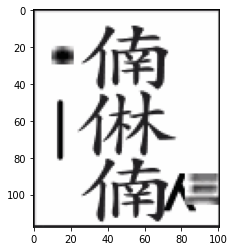

In [206]:
plt.imshow(cv2.imread('jeongganbo-png/splited-pngs/여민락_piri_859.png'))

In [211]:
outputs

OrderedDict([('jeongganbo-png/splited-pngs/여민락_ajaeng_20.png', '배임:2 황:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_daegeum_20.png',
              '임:2 청황:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_gayageum_20.png', '대:5'),
             ('jeongganbo-png/splited-pngs/여민락_geomungo_20.png', '배황_싸랭:5'),
             ('jeongganbo-png/splited-pngs/여민락_haegeum_20.png',
              '배임:2 황:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_piri_20.png', '배임:2 황:5 -:8'),
             ('jeongganbo-png/splited-pngs/여민락_ajaeng_21.png', '퇴성_루러표:5'),
             ('jeongganbo-png/splited-pngs/여민락_daegeum_21.png',
              '-:2 -:5 니나:8'),
             ('jeongganbo-png/splited-pngs/여민락_gayageum_21.png', '0:5'),
             ('jeongganbo-png/splited-pngs/여민락_geomungo_21.png', '0:5'),
             ('jeongganbo-png/splited-pngs/여민락_haegeum_21.png', '퇴성_루러표:5'),
             ('jeongganbo-png/splited-pngs/여민락_piri_21.png', '퇴성_루러표:5'),
             ('jeongganbo-png/spli

남:2 -:5 같은음표:7 니나:9


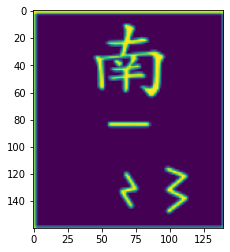

In [194]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
def make_inference(png_path, model, transform, tokenizer):
  img = cv2.imread(str(png_path))
  img = transform(img)

  transcription = model.inference(img.unsqueeze(0))

  return img, tokenizer.decode(transcription)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Grayscale(num_output_channels=1),
    transforms.Lambda(lambda x: 1-x),
    transforms.Resize((160, 140)),
    ])

img, transcription = make_inference(pngs[104], model, transform, tokenizer)

print(transcription)
plt.imshow(img[0])